In [ ]:
import pandas as pd

# Load the data from the Excel file
file_path = '/content/Preprocessed_Anxiety_Data_23MSDS15.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,subreddit,id,title,date,selftext,preprocess_text
0,Anxiety,bj74er,Anxious about giving my notice,2019-04-30,I’m going to give my 2 months notice to my emp...,i go give 2 month notic employ today it great ...
1,Anxiety,bj736e,"I (25/m) got fired at a retail job, makes me a...",2019-04-30,"I got fired at my sidejob at a retail store, I...",i get fire sidejob retail store i previou expe...
2,Anxiety,bj70cn,I always feels and act like I'm in a hurry eve...,2019-04-30,"I do everything very fast, I don't know what. ...",i everyth fast i know i tri slow sometim i
3,Anxiety,bj6xx7,How’s everyone feeling today?,2019-04-30,NaN,NaN
4,Anxiety,bj6sw3,Every time I get into a relationship or even j...,2019-04-30,It's happened so much to me in the past that i...,it happen much past standard i relationship i ...


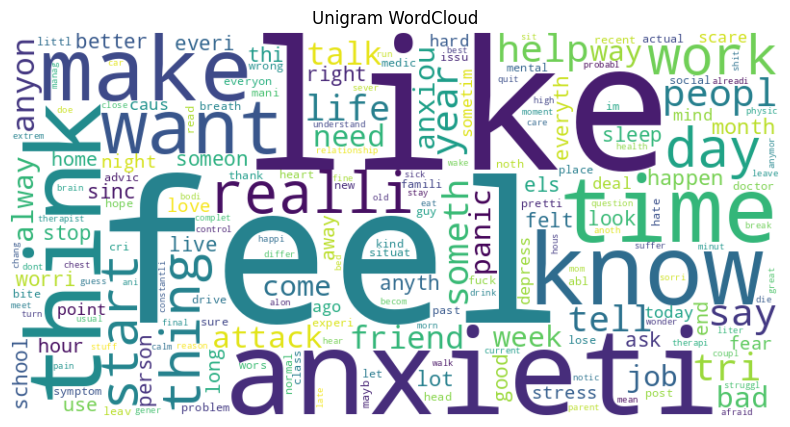

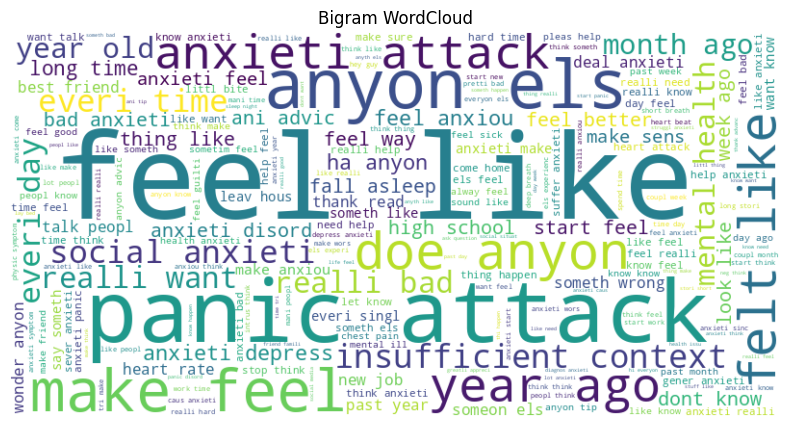

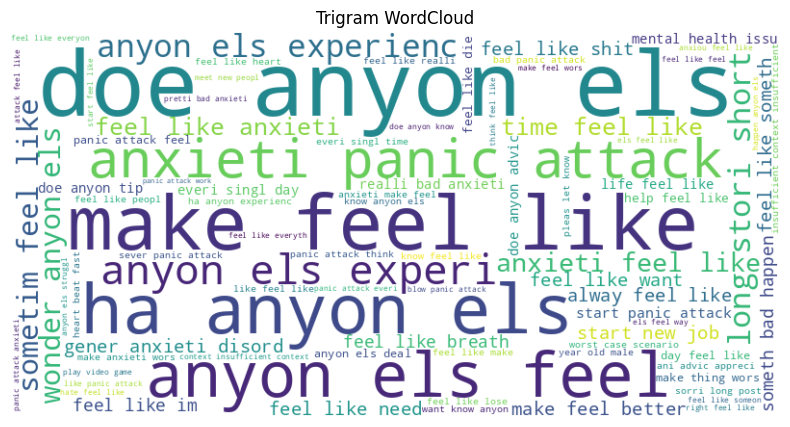

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Helper function to generate and display wordclouds
def generate_wordcloud(text, ngram_range=(1, 1), title="WordCloud"):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit([text])
    bag_of_words = vectorizer.transform([text])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    words_dict = dict(words_freq)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generating and displaying unigram wordcloud
generate_wordcloud(combined_text, ngram_range=(1, 1), title="Unigram WordCloud")

# Generating and displaying bigram wordcloud
generate_wordcloud(combined_text, ngram_range=(2, 2), title="Bigram WordCloud")

# Generating and displaying trigram wordcloud
generate_wordcloud(combined_text, ngram_range=(3, 3), title="Trigram WordCloud")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


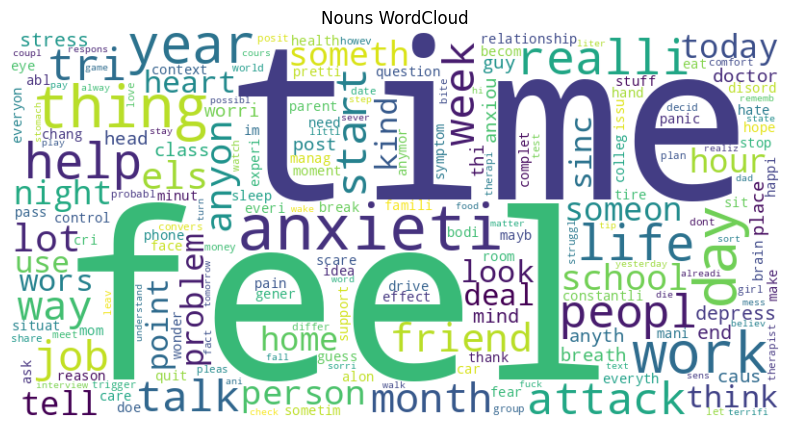

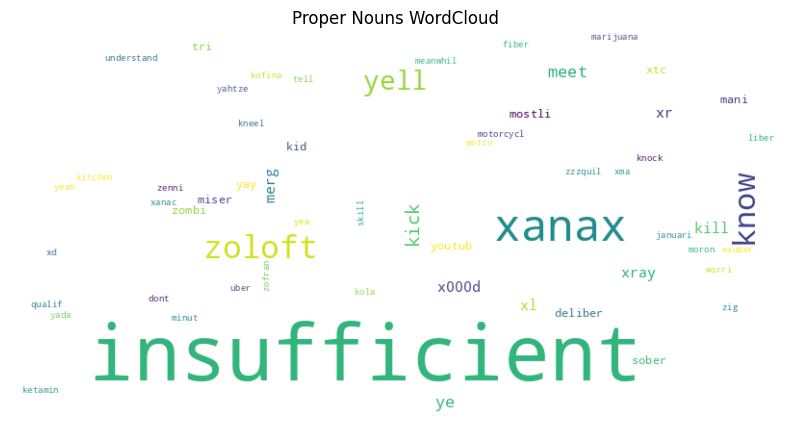

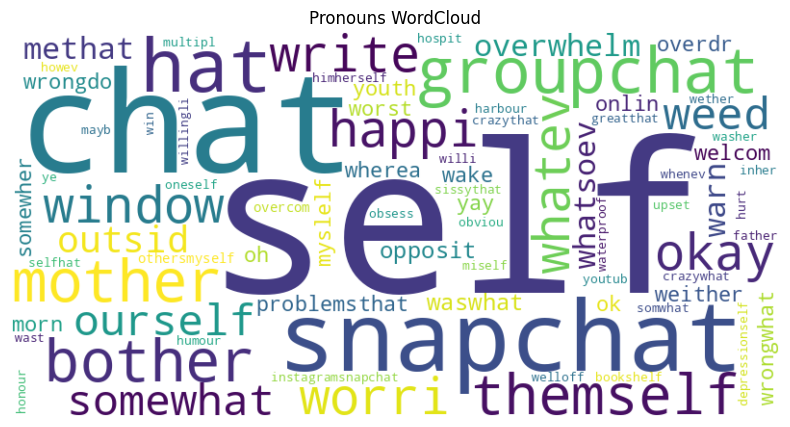

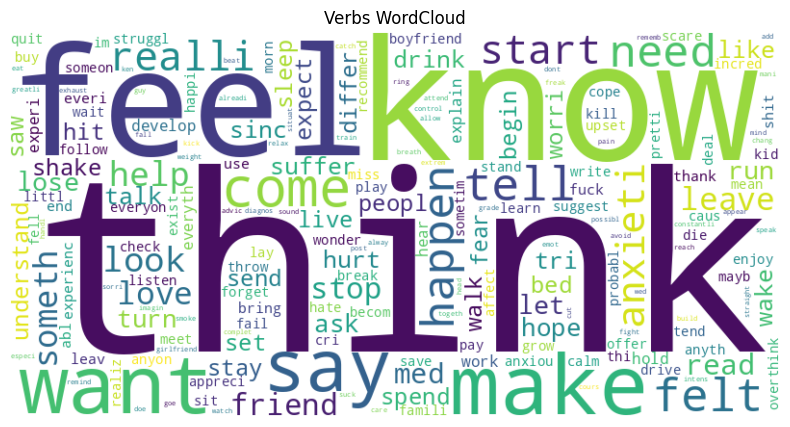

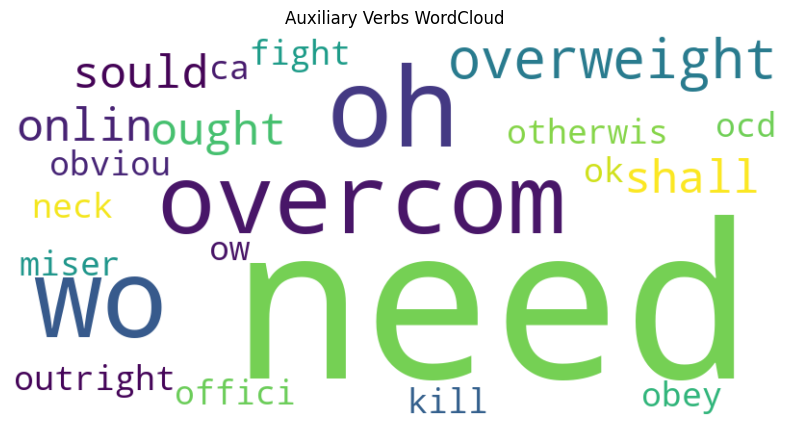

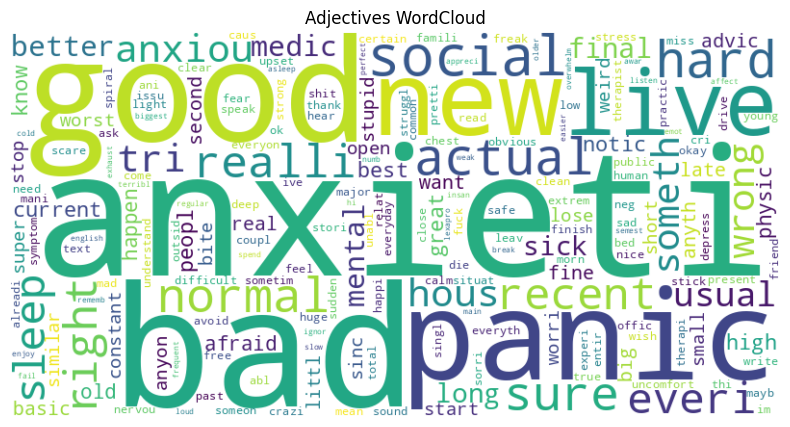

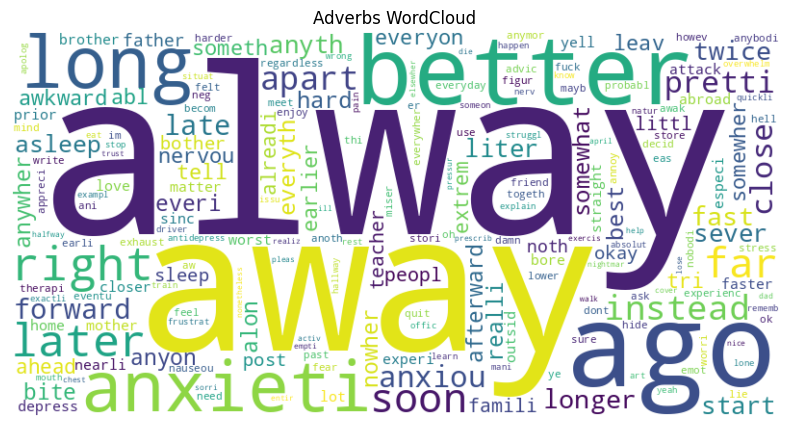

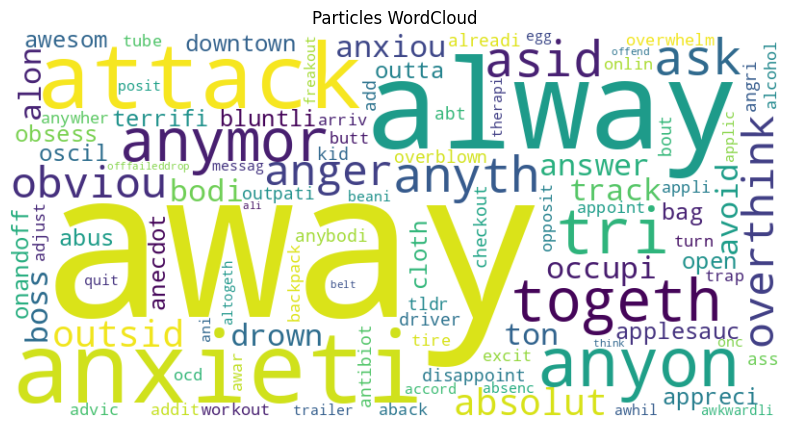

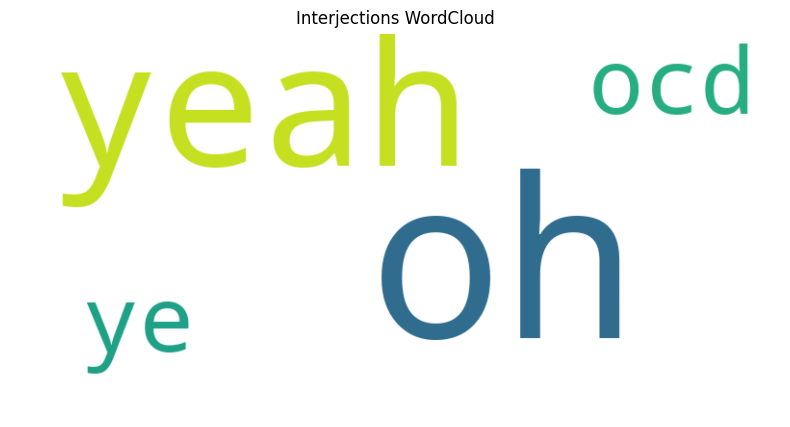

In [ ]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

# Function to filter words based on POS tags
def filter_pos_tags(text, desired_pos_tags):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token.lower() not in stopwords.words('english')]
    # POS tagging
    tagged = pos_tag(tokens)
    # Filter words based on POS tags
    filtered_words = ' '.join([word for word, tag in tagged if tag in desired_pos_tags])
    return filtered_words

# POS tags to generate wordclouds for
pos_tags = {
    "Nouns": ["NN", "NNS"],
    "Proper Nouns": ["NNP", "NNPS"],
    "Pronouns": ["PRP", "PRP$", "WP", "WP$"],
    "Verbs": ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
    "Auxiliary Verbs": ["MD"],
    "Adjectives": ["JJ", "JJR", "JJS"],
    "Adverbs": ["RB", "RBR", "RBS"],
    "Particles": ["RP"],
    "Interjections": ["UH"]
}

# Generate and display wordclouds for each POS tag
for pos_tag_name, tags in pos_tags.items():
    filtered_text = filter_pos_tags(combined_text, tags)
    generate_wordcloud(filtered_text, title=f"{pos_tag_name} WordCloud")
